In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
import itertools


In [2]:
# read the data file
df = pd.read_csv('iris.csv', header=None)
df.columns = ['sepal length','sepal width','petal length','petal width', 'species']
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# split the data into features and target
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

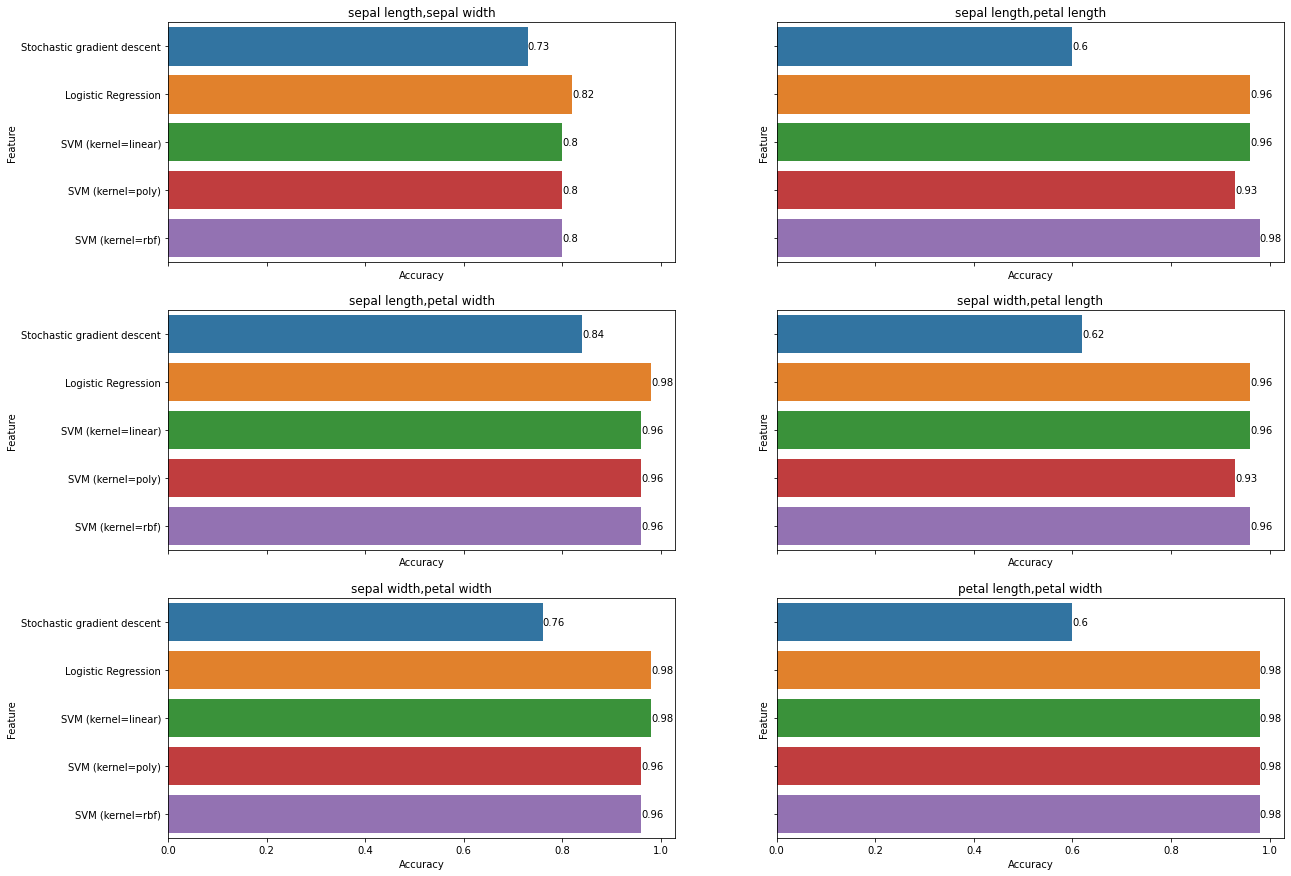

In [4]:

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharex=True, sharey=True)
axs = axs.reshape(-1)

for columns, ax in zip(list(itertools.combinations(X_train.columns, 2)), axs):
    acc = {}
    columns = list(columns)
    x_train = X_train[columns]
    x_test = X_test[columns]
    # build the sgd using training data
    sgd = SGDClassifier(loss='modified_huber', random_state=0).fit(x_train, y_train)
    acc['Stochastic gradient descent'] = round(sgd.score(x_test, y_test), 2)

    # build logistic regression
    lg = LogisticRegression(random_state=0).fit(x_train, y_train)
    acc['Logistic Regression'] = round(lg.score(x_test, y_test), 2)
    
    # build svm models
    for kernel in ['linear', 'poly', 'rbf']:
        svm = SVC(kernel=kernel, random_state=0).fit(x_train, y_train)
        acc[f'SVM (kernel={kernel})'] = round(svm.score(x_test, y_test), 2)
    
    # plot the accuracies
    acc_df = pd.DataFrame(zip(acc.keys(), acc.values()), columns=['Feature','Accuracy'])
    ax = sns.barplot(data=acc_df, y='Feature', x='Accuracy', ax=ax)
    ax.set_title(','.join(columns))
    ax.bar_label(ax.containers[0])
plt.show()

### Conclusion:
- Apart from `SGD loss=modified_huber`, all the models perform well with more features.
- SGD performed slighlty better with features `sepal_length` and `petal_width`.
- Logistic Regression performed the best overall. Apart from features `sepal_length` and `petal_length` (where `SVM kernel=rbf`performed the best), logisitic regression performed the best.
- Highest Accuracy we got is 98%, following are the models to acheive this
    - `SVM kernel=rbf` with features `sepal_length` and `petal_length`
    - `Logistic Regression` with features `sepal_length` and `petal_width`
    - `SVM kernel=linear` and `Logistic Regression` with features `sepal width` and `petal width`.
    - All `SVM` models and `Logistic Regression` with features `petal length` and `petal width`.